In [99]:
import sklearn
import sklearn.datasets
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram

In [100]:
class Single_Linkage():
    def __init__(self, data):
        self.data = data
        self.N = len(self.data)
        self.points_distances = np.array([np.array([np.inf] * self.N)] *
                                             self.N)
        self.latest_cluster = np.arange(self.N)            
        self.total_number_of_cluster = self.N            
        self.single_linkage_matrix = []
        
    def fit_data(self):
        self.create_distance()
        while len(self.latest_cluster[self.latest_cluster ==
                                      self.latest_cluster[0]]) != self.N:
            x, y = self.find_min_distance()
            self.update_single_linkage_matrix(x,y)
        return self.single_linkage_matrix
        
    def create_distance(self):
        for i in range(self.N):
            for j in range(i+1, self.N):
                self.points_distances[i][j] = np.linalg.norm(self.data[i] - self.data[j])
    
    def find_min_distance(self):
        index = np.where(self.points_distances == self.points_distances.min())
        #print(index)
        x = index[0][0]
        y = index[1][0]
        return x, y
    
    def update_single_linkage_matrix(self, i, j):
        temp1 = self.latest_cluster[i]
        temp2 = self.latest_cluster[j]
        if temp1 != temp2:
            temp = self.update_latest_cluster(i, j)
            row = [temp1, temp2, self.points_distances[i][j], temp]
            self.single_linkage_matrix.append(row)
        self.points_distances[i][j] = np.inf
    
    def update_latest_cluster(self, i, j):
        temp = self.total_number_of_cluster
        self.latest_cluster[self.latest_cluster ==
                            self.latest_cluster[i]] = temp
        self.latest_cluster[self.latest_cluster ==
                            self.latest_cluster[j]] = temp
        self.total_number_of_cluster += 1
        return len(self.latest_cluster[self.latest_cluster == temp])



# example 1

In [101]:
X = np.array([[i] for i in [2, 8, 0, 4, 1, 9, 9, 0]])
test0 = Single_Linkage(X)

In [102]:
Z = test0.fit_data()

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [35.0, 35.0, 45.0, 45.0],
  [55.0, 55.0, 65.0, 65.0],
  [40.0, 40.0, 60.0, 60.0],
  [50.0, 50.0, 75.0, 75.0],
  [12.5, 12.5, 62.5, 62.5]],
 'dcoord': [[0.0, 0.0, 0.0, 0.0],
  [0.0, 1.0, 1.0, 0.0],
  [0.0, 0.0, 0.0, 0.0],
  [0.0, 1.0, 1.0, 0.0],
  [0.0, 1.0, 1.0, 1.0],
  [1.0, 2.0, 2.0, 0.0],
  [1.0, 4.0, 4.0, 2.0]],
 'ivl': ['1', '5', '6', '2', '7', '0', '4', '3'],
 'leaves': [1, 5, 6, 2, 7, 0, 4, 3],
 'color_list': ['g', 'g', 'r', 'r', 'r', 'r', 'b']}

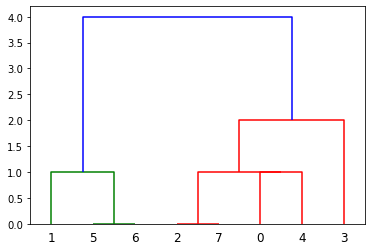

In [103]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram

dendrogram(Z)

# example 2

In [104]:
import sklearn.datasets
data = sklearn.datasets.load_iris().data
data = data[:,:]*10 - data.min(axis=0)*10
data = np.array(data, dtype='int')

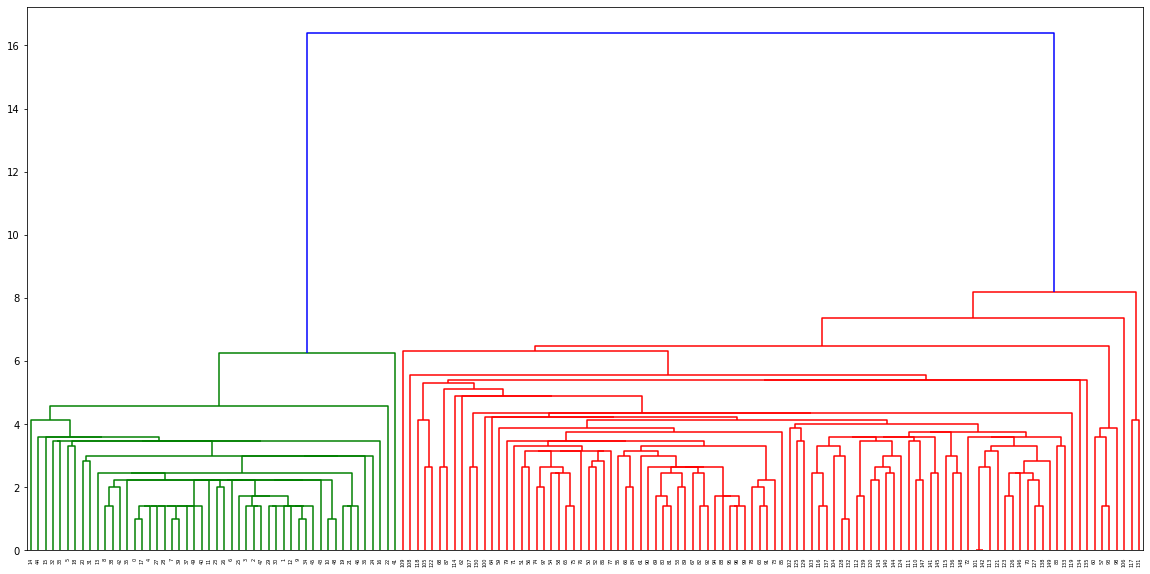

In [105]:
test0 = Single_Linkage(data)
out = test0.fit_data()
plt.figure(figsize=(20,10))
dendrogram(out)
pass